In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
###  using titanic data set

In [ ]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data['PassengerId'].nunique()

891

In [ ]:
df=data.drop('PassengerId',axis=1)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data['Sex'].nunique()

2

In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

to know how many female survived

In [ ]:
female=df.loc[df.Sex=='female']['Survived']

In [ ]:
female.head()

1    1
2    1
3    1
8    1
9    1
Name: Survived, dtype: int64

In [ ]:
## percentage of female survived
print('% of female survived is :',sum(female)/len(female))

% of female survived is : 0.7420382165605095


In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

<Axes: >

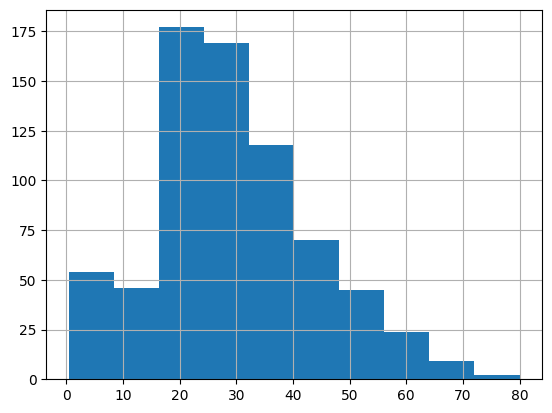

In [ ]:
## outlier detection
df['Age'].hist()

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [ ]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Name'].nunique()

891

In [ ]:
df['Ticket'].nunique()

681

In [ ]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
## split our data into features and target

In [ ]:
x=df.drop('Survived',axis=1)

In [ ]:
y=df['Survived']

In [ ]:
## we need to split into train and test
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
## to know whether the person has survived or not
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg=LogisticRegression()

In [ ]:
log_reg_model=log_reg.fit(x_train,y_train)

In [ ]:
log_pred=log_reg_model.predict(x_test)

In [ ]:
## import accuracy matrices
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
print('Confusion matrix is :\n',confusion_matrix(y_test,log_pred))

Confusion matrix is :
 [[90 15]
 [19 55]]


In [ ]:
print('Accuracy score is :',accuracy_score(y_test,log_pred))

Accuracy score is : 0.8100558659217877


In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
precision_score(y_test,log_pred)

0.7857142857142857

In [ ]:
recall_score(y_test,log_pred)

0.7432432432432432

In [ ]:
## SVM
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)
print('Confusion matrix is :\n',confusion_matrix(y_test,svm_pred))

Confusion matrix is :
 [[88 17]
 [22 52]]


In [ ]:
print('Accuracy score is :',accuracy_score(y_test,svm_pred))

Accuracy score is : 0.7821229050279329
